In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("D:\GitHub\Glassdoor_Jobs\salary_data_cleaned.csv")


In [3]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return ''
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [4]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [5]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
                   14
Name: job_simp, dtype: int64

In [5]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [6]:
df.columns

df['job_state'] = df.jobs_state.apply(lambda x:x.strip() if x.strip().lower()!= 'los angeles' else 'CA')
df.job_state.value_counts()
df.drop('job state', inplace=True, axis=1)

KeyError: "['job state'] not found in axis"

In [7]:
# job description length
df['desc_len'] =df['Job Description'].apply(len)
df['desc_len']

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_len, Length: 742, dtype: int64

In [38]:
# competitor count
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!= '-1' else 0)


AttributeError: 'int' object has no attribute 'split'

In [9]:
df.columns
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly==1 else x.min_salary, axis=1)

df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,24
177,1,42,34
197,1,36,25
202,1,42,34
210,1,30,25
246,1,34,24
271,1,42,34
337,1,36,25
345,1,48,39
357,1,42,34


In [10]:
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly==1 else x.max_salary, axis=1)


In [11]:
df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [12]:
# remove new line character from company text
df['company_txt'] = df.company_txt.apply(lambda x : x.replace('\r','').replace('\n',''))

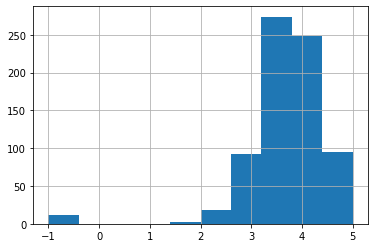

In [14]:
df.Rating.hist()

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average salary', 'company_txt', 'jobs_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'tableau', 'jmp',
       'power_bi', 'job_simp', 'seniority', 'job_state', 'desc_len'],
      dtype='object')

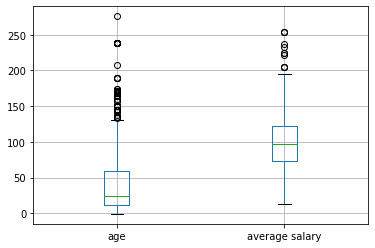

In [34]:

df.boxplot(column = ['age','average salary'])
plt.show()

In [19]:
df[['age','average salary','Rating','desc_len']].corr()


,age,average salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.165090
average salary,0.019655,1.000000,0.013492,0.078093
Rating,0.021655,0.013492,1.000000,-0.012631
desc_len,0.165090,0.078093,-0.012631,1.000000


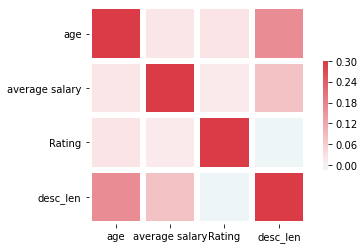

In [13]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','average salary','Rating','desc_len']].corr(),
            vmax=.3,center=0, cmap=cmap,
            square=True,linewidths=5,
            cbar_kws={"shrink":.5})

In [14]:
cat_vars = []
for colname in df.columns:
    if df[colname].dtype == 'object':
        cat_vars.append(colname)
print(cat_vars)

['Job Title', 'Salary Estimate', 'Job Description', 'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'jobs_state', 'job_simp', 'seniority', 'job_state']


['Job Title', 'Salary Estimate', 'Job Description', 'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'jobs_state', 'job_simp', 'seniority', 'job_state']


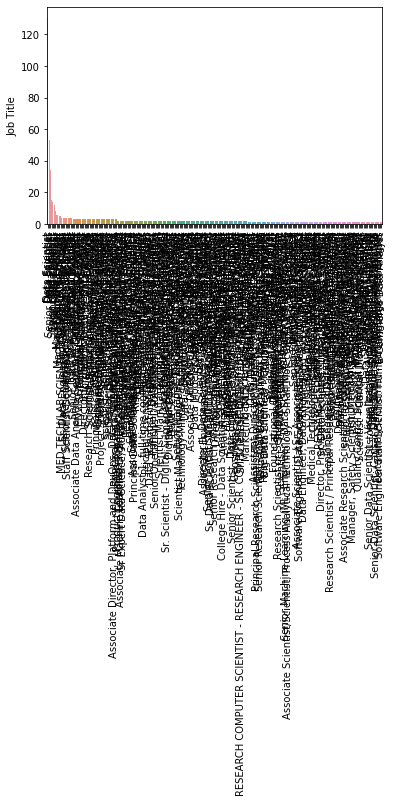

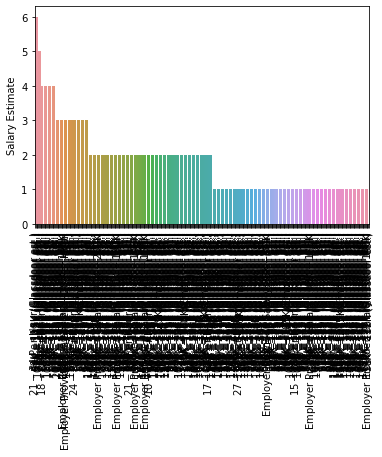

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 61607 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.


In [ ]:


df_cat = df[cat_vars]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    sns.barplot(x=cat_num.index, y = cat_num)
    plt.xticks(rotation = 90)
    plt.show()
        

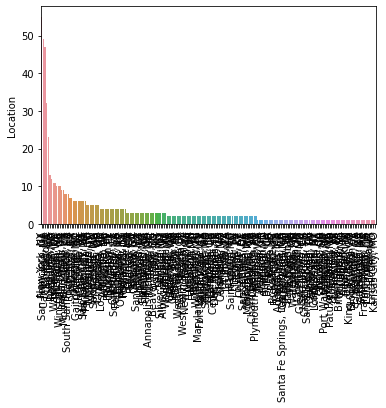

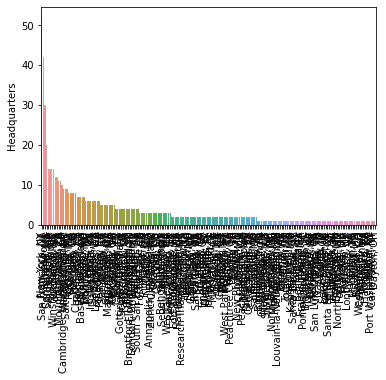

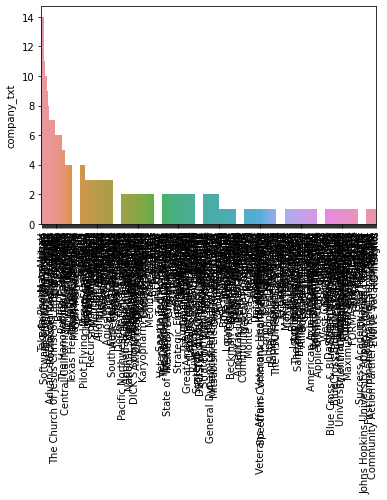

In [16]:
df_cat = df[cat_vars]
for i in df_cat[['Location', 'Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()
    sns.barplot(x=cat_num.index, y = cat_num)
    plt.xticks(rotation = 90)
    plt.show()
        

In [19]:
# group by in python, 
pd.pivot_table(df, index=["job_simp","seniority"], values="average salary")

average salary
job_simp       seniority                
               na             168.607143
analyst        jr              56.500000
               na              61.155405
               senior          79.092593
data engineer  na              96.701220
               senior         124.689189
data scientist jr             106.500000
               na             107.043011
               senior         138.956522
manager        na              84.022727
mle            na             119.133333
               senior         142.071429
na             na              73.988189
               senior         109.061404

In [23]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [34]:
pd.pivot_table(df, index = ['job_state','job_simp'], values='average salary', aggfunc='count').sort_values('job_state',ascending = False)

average salary
job_state job_simp                      
WI        na                           4
          data scientist               3
          analyst                      3
WA        na                           1
          data scientist              17
          analyst                      3
VA        na                           5
          mle                          2
          data scientist              18
          data engineer               10
          analyst                      6
UT        data engineer                3
          analyst                      4
          data scientist               3
TX        na                           7
          data scientist              13
          data engineer                8
TN        data scientist               1
          data engineer               10
          analyst                      2
SC        na                           1
RI        analyst                      1
PA        manager                      3
          data engineer                1
          data scientist               6
          analyst                      8
          mle                          7
          na                           8
OR        data scientist               3
          data engineer                1
OH        na                           3
          data scientist               7
          analyst                      4
NY        na                          12
          mle                          2
          data scientist              40
          data engineer                4
          analyst                     14
NM        data scientist               3
NJ        data engineer                2
                                       2
          analyst                      6
          manager                      2
          data scientist               4
          na                           1
NE        na                           4
NC        na                          12
          data scientist               3
          data engineer                6
MO        na                           3
          manager                      1
          data scientist               3
          analyst                      2
MN        data engineer                1
          analyst                      1
MI        manager                      2
          data scientist               4
MD        na                          16
          data scientist              13
          data engineer                3
          analyst                      3
MA        na                          46
          manager                      5
          data scientist              30
          data engineer               12
          analyst                      4
                                       6
LA        analyst                      1
          data engineer                2
          na                           1
KY        na                           4
          data scientist               2
KS        mle                          3
IN        na                           4
          data scientist               2
          data engineer                4
IL                                     6
          na                           6
          mle                          2
          data scientist              15
          data engineer                8
          analyst                      3
ID        analyst                      2
IA        analyst                      2
          data engineer                3
GA        data scientist               3
          na                           3
FL        data scientist               7
          data engineer                3
          analyst                      6
DE        na                           6
DC        data scientist               5
          data engineer                4
          analyst                      2
CT        na                           3
          data scientist               2
CO      

In [35]:
# salary by rating
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average salary', 'company_txt', 'jobs_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'tableau', 'jmp',
       'power_bi', 'job_simp', 'seniority', 'job_state', 'desc_len'],
      dtype='object')

In [46]:
df_pivots = df[['Rating','Industry','Sector','Revenue','Competitors','hourly','employer_provided','python_yn','R_yn','spark','aws','excel','tableau','jmp','power_bi','desc_len','Type of ownership','average salary']]


In [49]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='average salary').sort_values('average salary',ascending=False))

Rating
        average salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 3.2        105.500000
 4.0        105.340426
 3.5        104.897959
 3.7        104.131148
 4.7        103.983871
 4.3        102.468750
 3.3        101.858974
 4.2        100.442308
 2.2         97.750000
 4.6         97.250000
 3.8         96.811475
 2.1         95.900000
 3.4         93.011364
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.467391
 2.8         83.928571
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286
Industry
                                          average salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & Distribution      146.0000

ValueError: Grouper for 'average salary' not 1-dimensional

In [51]:
pd.pivot_table(df_pivots,index='Revenue',columns= 'python_yn',values='average salary',aggfunc ='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [5]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

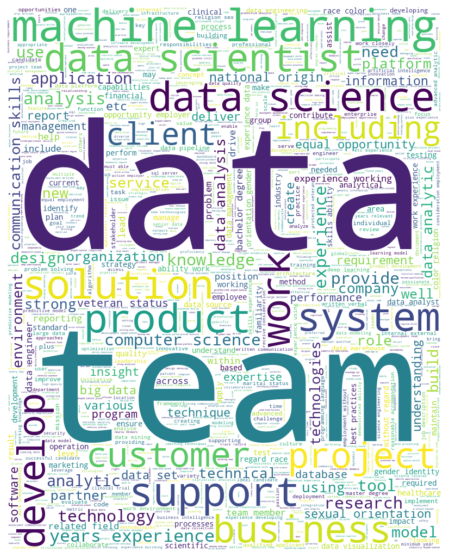

In [15]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered
    
words_filtered = punctuation_stop(words)
#print(words_filtered)
text = " ".join([ele for ele in words_filtered])

wc=WordCloud(background_color="white",random_state=1,max_words=2000,width=800,height=1000) 
wc.generate(text)
             
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()